In [3]:
import numpy as np  
import pandas as pd  
##from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
import datetime
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

See https://datascienceplus.com/how-to-apply-monte-carlo-simulation-to-forecast-stock-prices-using-python/

In [92]:
#Fitting quantile and time horizon
quantile = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
year = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

def business_days(since, until):
    since_isoweekday = since.isoweekday() + 1
    return len([x for x in range(since_isoweekday,
                                 since_isoweekday + (until - since).days)
                if x % 7 not in [0, 6]])

for yy in year:
    for qq in quantile:
        end = datetime.datetime(2018, 1, 1)
        start = datetime.datetime(yy, 1, 1)

        my_stock1 = yf.Ticker('USDRUB=X')
        my_stock1 = pd.DataFrame(my_stock1.history(start = start, end = end)['Close'])
        #correcting mistake in data
        my_stock1['Close']['2016-01-06']=72.9299
        my_stock1 = my_stock1.rename(str.lower, axis = 'columns')
        log_returns1 = np.log(1 + my_stock1.pct_change())
        
        u1 = log_returns1.mean()
        var1 = log_returns1.var()
        drift1 = u1- (0.5 * var1)
        stdev1 = log_returns1.std()
        
        
        t_intervals1 = 5033
        iterations1 = 10000
        
        daily_returns1 = np.exp(drift1.values + stdev1.values * norm.ppf(np.random.rand(t_intervals1, iterations1)))
        S01 = my_stock1.iloc[-1]
        price_list1 = np.zeros_like(daily_returns1)
        price_list1[0] = S01
        
        for t in range(1, t_intervals1):
            price_list1[t] = price_list1[t - 1] * daily_returns1[t]

        
        mean1=np.zeros(5033)
        for t in range(len(mean1)):
            mean1[t] = np.quantile(price_list1[t], qq)
        
        now = datetime.datetime(2020,10,1)
        my_stock2 = yf.Ticker('USDRUB=X')
        my_stock2 = pd.DataFrame(my_stock2.history(start = end, end = now)['Close'])
        #correcting mistake in data
        my_stock2['Close']['2016-01-06']=72.9299
        my_stock2 = my_stock2.rename(str.lower, axis = 'columns')
        log_returns2 = np.log(1 + my_stock2.pct_change())
        
        ss = business_days(datetime.datetime(yy, 1, 1), datetime.datetime(2018, 1, 1))+1 #Здесь можно менять дату
        nn = business_days(datetime.datetime(yy, 1, 1), datetime.datetime(2020, 10, 1)) #У меня код брал разницу с yy
        
        l = mean1[ss:nn] - my_stock2['close']
        l.dropna(inplace = True)
        loss = sum(map(lambda x:x*x,l))
        print(yy, ' ', qq, ' ', loss)

2008   0.05   238895.07599893218
2008   0.1   32143.120986246235
2008   0.15   16861.15852526836
2008   0.2   119754.23405183025
2008   0.25   298247.1290598857
2008   0.3   565847.0413996864
2009   0.05   562889.6881129693
2009   0.1   278543.9020009043
2009   0.15   81977.52714709398
2009   0.2   25451.540529457274
2009   0.25   15701.98852251775
2009   0.3   52080.27331979846
2010   0.05   342242.2814499147
2010   0.1   111899.13061480077
2010   0.15   20168.831724373184
2010   0.2   15775.270763939288
2010   0.25   85683.09352178458
2010   0.3   179345.84411292677
2011   0.05   305985.7063989505
2011   0.1   101028.71730665141
2011   0.15   16922.9441701498
2011   0.2   17189.816303053776
2011   0.25   75720.5757929727
2011   0.3   192991.83577279362
2012   0.05   316035.1463882698
2012   0.1   112606.53887487177
2012   0.15   24943.54898758146
2012   0.2   11341.542287318487
2012   0.25   64338.30936021769
2012   0.3   163971.92266310976
2013   0.05   190966.5863522147
2013   0.1 

In [97]:
#Fitting quantile and time horizon
quantile = [0.13,0.131, 0.132, 0.133, 0.134,0.135,0.136,0.137,
            0.138,0.139,0.14,0.141, 0.142, 0.143, 0.144,0.145,0.146,0.147,
            0.148,0.149,0.15,0.151, 0.152, 0.153,0.154,0.155,0.156,0.157]
year = [2013]

def business_days(since, until):
    since_isoweekday = since.isoweekday() + 1
    return len([x for x in range(since_isoweekday,
                                 since_isoweekday + (until - since).days)
                if x % 7 not in [0, 6]])

for yy in year:
    for qq in quantile:
        end = datetime.datetime(2018, 1, 1)
        start = datetime.datetime(yy, 1, 1)

        my_stock1 = yf.Ticker('USDRUB=X')
        my_stock1 = pd.DataFrame(my_stock1.history(start = start, end = end)['Close'])
        #correcting mistake in data
        my_stock1['Close']['2016-01-06']=72.9299
        my_stock1 = my_stock1.rename(str.lower, axis = 'columns')
        log_returns1 = np.log(1 + my_stock1.pct_change())
        
        u1 = log_returns1.mean()
        var1 = log_returns1.var()
        drift1 = u1- (0.5 * var1)
        stdev1 = log_returns1.std()
        
        
        t_intervals1 = 5033
        iterations1 = 10000
        
        daily_returns1 = np.exp(drift1.values + stdev1.values * norm.ppf(np.random.rand(t_intervals1, iterations1)))
        S01 = my_stock1.iloc[-1]
        price_list1 = np.zeros_like(daily_returns1)
        price_list1[0] = S01
        
        for t in range(1, t_intervals1):
            price_list1[t] = price_list1[t - 1] * daily_returns1[t]

        
        mean1=np.zeros(5033)
        for t in range(len(mean1)):
            mean1[t] = np.quantile(price_list1[t], qq)
        
        now = datetime.datetime(2020,10,1)
        my_stock2 = yf.Ticker('USDRUB=X')
        my_stock2 = pd.DataFrame(my_stock2.history(start = end, end = now)['Close'])
        #correcting mistake in data
        my_stock2['Close']['2016-01-06']=72.9299
        my_stock2 = my_stock2.rename(str.lower, axis = 'columns')
        log_returns2 = np.log(1 + my_stock2.pct_change())
        
        ss = business_days(datetime.datetime(yy, 1, 1), datetime.datetime(2018, 1, 1))+1 #Здесь можно менять дату
        nn = business_days(datetime.datetime(yy, 1, 1), datetime.datetime(2020, 10, 1)) #У меня код брал разницу с yy
        
        l = mean1[ss:nn] - my_stock2['close']
        l.dropna(inplace = True)
        loss = sum(map(lambda x:x*x,l))
        print(yy, ' ', qq, ' ', loss)

2013   0.13   9202.389722646614
2013   0.131   9087.878646380901
2013   0.132   8507.084654839451
2013   0.133   9178.76848131914
2013   0.134   9620.971379629495
2013   0.135   8871.080102326225
2013   0.136   9008.305444034093
2013   0.137   8869.639660315328
2013   0.138   8980.550735115974
2013   0.139   9317.324091370443
2013   0.14   9168.904329821482
2013   0.141   10386.531383061505
2013   0.142   11030.546057873016
2013   0.143   9321.277710671378
2013   0.144   9877.341425791028
2013   0.145   12326.880671434745
2013   0.146   10245.616851115588
2013   0.147   11143.074362843385
2013   0.148   10490.373536696561
2013   0.149   11335.29262613556
2013   0.15   12180.246603890535
2013   0.151   11788.876780065208
2013   0.152   12662.573061923738
2013   0.153   13056.109644042202
2013   0.154   13107.750993893627
2013   0.155   16489.109555379124
2013   0.156   14418.66919309288
2013   0.157   17760.9945431157


In [99]:
datetime.datetime(2029, 4, 9)-datetime.datetime(2020, 10, 1)

datetime.timedelta(days=3112)

In [101]:
end = datetime.datetime(2020, 10, 1)
start = datetime.datetime(2013, 1, 1)



my_stock = yf.Ticker('USDRUB=X')
my_stock = pd.DataFrame(my_stock.history(start = start, end = end)['Close'])
#my_stock = my_stock.rename(str.lower, axis = 'columns')

#correcting mistake in data
my_stock['Close']['2016-01-06']=72.9299
my_stock

,Close
Date,
2012-12-31,30.440201
2013-01-01,30.502001
2013-01-02,30.337200
2013-01-03,30.156500
2013-01-04,30.271000
...,...
2020-09-24,76.797302
2020-09-25,77.026398
2020-09-28,78.103798


In [102]:
#estimating historical log returns
log_returns = np.log(1 + my_stock.pct_change())
log_returns.tail()

,Close
Date,
2020-09-24,0.010186
2020-09-25,0.002979
2020-09-28,0.013890
2020-09-29,0.013450
2020-09-30,-0.002483


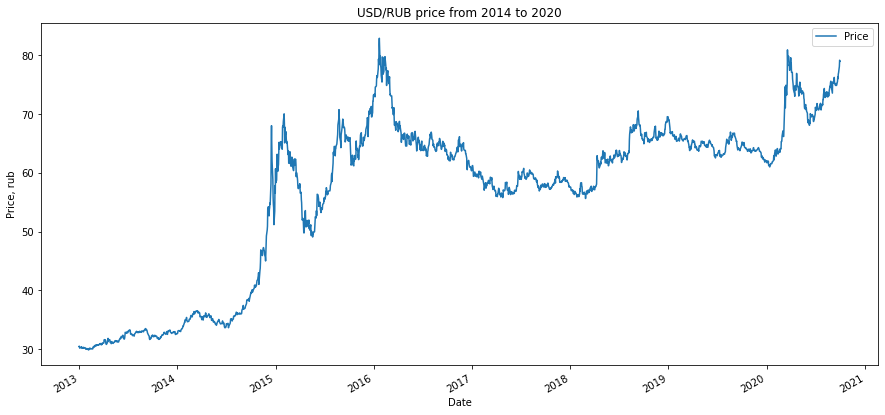

In [103]:
#estimating historical log returns
log_returns = np.log(1 + my_stock.pct_change())

my_stock.plot(figsize=(15, 7))
plt.title('USD/RUB price from 2014 to 2020')
plt.xlabel('Date')
plt.legend(['Price'])
plt.ylabel('Price, rub')
plt.show()

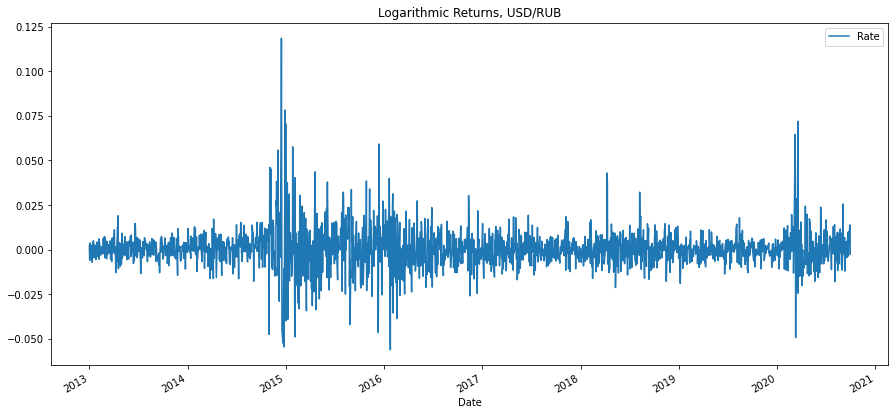

In [104]:
log_returns.plot(figsize = (15, 7))
plt.title('Logarithmic Returns, USD/RUB')
plt.legend(['Rate'])
plt.xlabel('Date')
plt.show()

In [105]:
#calculating mean, var, drift
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()
#predictions for next 3112 days
t_intervals = 3112
iterations = 10000

In [106]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[1.00323353, 0.98586637, 1.00254038, ..., 0.99459614, 1.00466171,
        0.99996901],
       [0.99170737, 1.00559007, 0.98142457, ..., 1.00277755, 1.00215753,
        1.02129495],
       [1.01627075, 0.98715814, 1.0146607 , ..., 1.01041794, 1.02429102,
        1.00645278],
       ...,
       [1.0046622 , 0.99466018, 1.01356154, ..., 0.99645858, 1.00020413,
        1.00309937],
       [0.99320305, 0.98262787, 0.99445145, ..., 0.97588423, 0.98055335,
        0.98617966],
       [0.98312024, 1.01760607, 1.00857542, ..., 1.0229635 , 0.99182508,
        0.97896451]])

In [107]:
S0 = my_stock.iloc[-1]
S0

Close    78.965103
Name: 2020-09-30 00:00:00, dtype: float64

In [109]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[78.96510315, 78.96510315, 78.96510315, ..., 78.96510315,
        78.96510315, 78.96510315],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [110]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[  78.96510315,   78.96510315,   78.96510315, ...,   78.96510315,
          78.96510315,   78.96510315],
       [  78.31027445,   79.40652337,   77.49829235, ...,   79.18443265,
          79.13547266,   80.64666117],
       [  79.58444123,   78.38679605,   78.63447139, ...,   80.00937161,
          81.05775375,   81.16705654],
       ...,
       [ 589.94599793,  250.99975733,  174.78214423, ...,  371.62714501,
        1008.72421887,  322.26479088],
       [ 585.93616301,  246.63935757,  173.81235693, ...,  362.66507072,
         989.10791547,  317.81098031],
       [ 576.04569983,  250.98170682,  175.30287093, ...,  370.99312914,
         981.02203434,  311.12567096]])

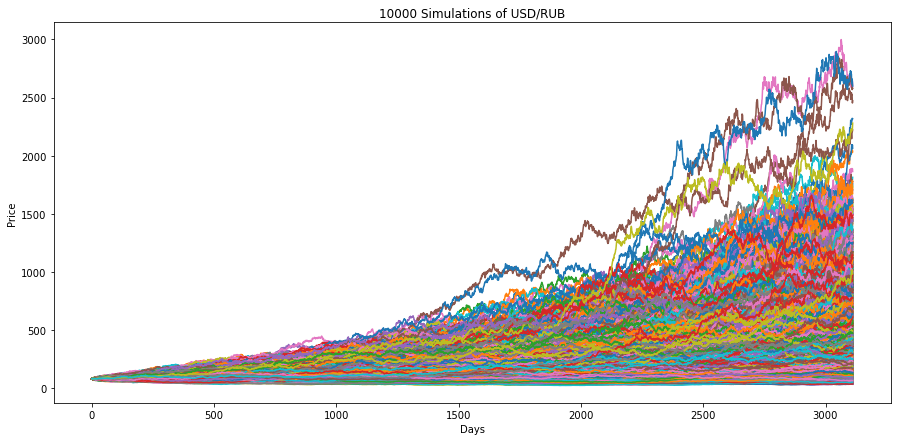

In [111]:
#10,000 possible paths of the expected price of RUB, starting from the last day for which we have data
plt.figure(figsize=(15,7))
plt.plot(price_list);
plt.title('10000 Simulations of USD/RUB')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

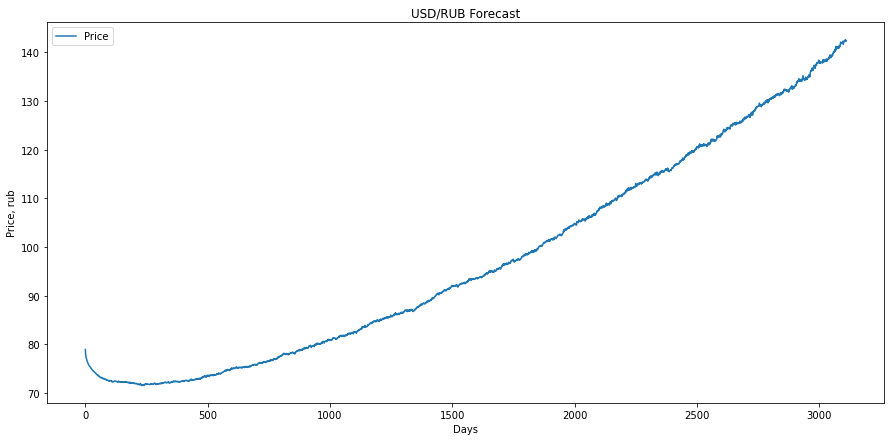

In [112]:
mean0=np.zeros(3112)
for t in range(len(mean0)):
    mean0[t] = np.quantile(price_list[t], 0.132)
pd.DataFrame(mean0).plot(figsize=(15, 7))
plt.title('USD/RUB Forecast')
plt.legend(['Price'])
plt.xlabel('Days')
plt.ylabel('Price, rub')
plt.show()

In [117]:
#To Excel
import openpyxl

In [118]:
df1=pd.DataFrame(mean0)
with pd.ExcelWriter(r'C:\Users\Lena\Desktop\f2.xlsx') as writer:
    df1.to_excel(writer)